In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np

In [5]:
# Load the Excel files from Colab's /content/ directory
indian_df = pd.read_excel('/content/IN_Data.xlsx', engine='openpyxl')
japanese_df = pd.read_excel('/content/JPN_Data.xlsx', engine='openpyxl')

In [6]:
# Display first few rows to understand the structure
print("INDIAN DATASET")
display(indian_df.head())

print("JAPANESE DATASET")
display(japanese_df.head())

INDIAN DATASET


,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27


JAPANESE DATASET


,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


In [7]:
print("INDIAN DATA INFO:")
indian_df.info()
print("\nJAPANESE DATA INFO:")
japanese_df.info()

INDIAN DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          70000 non-null  object        
 1   CURR_AGE    70000 non-null  int64         
 2   GENDER      70000 non-null  object        
 3   ANN_INCOME  70000 non-null  int64         
 4   DT_MAINT    70000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.7+ MB

JAPANESE DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   GENDER      40000 non-null  object 
 3   ANN_INCOME  40000 non-null  float64
 4   AGE_CAR     40000 non-null  int64  
 5   PURCHASE    40000 non-null  int64  
dtypes: floa

In [8]:
print("Missing Values - Indian Dataset:")
print(indian_df.isnull().sum())

print("\nMissing Values - Japanese Dataset:")
print(japanese_df.isnull().sum())

Missing Values - Indian Dataset:
ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
DT_MAINT      0
dtype: int64

Missing Values - Japanese Dataset:
ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
AGE_CAR       0
PURCHASE      0
dtype: int64


In [9]:
# Drop rows with any missing values (if very few)
indian_df.dropna(inplace=True)
japanese_df.dropna(inplace=True)

In [10]:
# Convert Gender to numeric
if 'Gender' in indian_df.columns:
    indian_df['Gender'] = indian_df['Gender'].map({'Male': 1, 'Female': 0})
    japanese_df['Gender'] = japanese_df['Gender'].map({'Male': 1, 'Female': 0})

# One-hot encode Job column
if 'Job' in indian_df.columns:
    indian_df = pd.get_dummies(indian_df, columns=['Job'], drop_first=True)
    japanese_df = pd.get_dummies(japanese_df, columns=['Job'], drop_first=True)

In [11]:
indian_df.drop_duplicates(inplace=True)
japanese_df.drop_duplicates(inplace=True)

In [12]:
indian_df.to_csv("cleaned_indian.csv", index=False)
japanese_df.to_csv("cleaned_japanese.csv", index=False)

In [13]:
print(f"Indian Dataset: {indian_df.shape}")
print(f"Japanese Dataset: {japanese_df.shape}")

print("\nSummary (Indian):")
display(indian_df.describe())

print("\nSummary (Japanese):")
display(japanese_df.describe())

Indian Dataset: (70000, 5)
Japanese Dataset: (40000, 6)

Summary (Indian):


,CURR_AGE,ANN_INCOME,DT_MAINT
count,70000.000000,7.000000e+04,70000
mean,44.995314,1.148679e+06,2018-06-28 16:10:28.662856960
min,25.000000,3.000330e+05,2016-09-14 00:00:00
25%,35.000000,8.568238e+05,2018-03-15 00:00:00
50%,45.000000,1.125152e+06,2018-07-26 00:00:00
75%,55.000000,1.438676e+06,2018-12-24 00:00:00
max,65.000000,1.999989e+06,2019-06-30 00:00:00
std,11.822122,3.994505e+05,NaN



Summary (Japanese):


,CURR_AGE,ANN_INCOME,AGE_CAR,PURCHASE
count,40000.00000,40000.000000,40000.000000,40000.000000
mean,44.99745,359398.878050,359.080250,0.575775
std,11.82008,175109.262950,203.063724,0.494231
min,25.00000,70089.000000,1.000000,0.000000
25%,35.00000,219766.000000,235.000000,0.000000
50%,45.00000,337656.833333,331.000000,1.000000
75%,55.00000,464261.000000,444.000000,1.000000
max,65.00000,799970.666667,1020.000000,1.000000


In [14]:
# Check gender and purchase distribution
print("Indian Gender Distribution:")
print(indian_df['GENDER'].value_counts())

print("\nJapanese Gender Distribution:")
print(japanese_df['GENDER'].value_counts())

print("\nJapanese Purchase Decision:")
print(japanese_df['PURCHASE'].value_counts())

Indian Gender Distribution:
GENDER
M    35029
F    34971
Name: count, dtype: int64

Japanese Gender Distribution:
GENDER
M    22285
F    17715
Name: count, dtype: int64

Japanese Purchase Decision:
PURCHASE
1    23031
0    16969
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


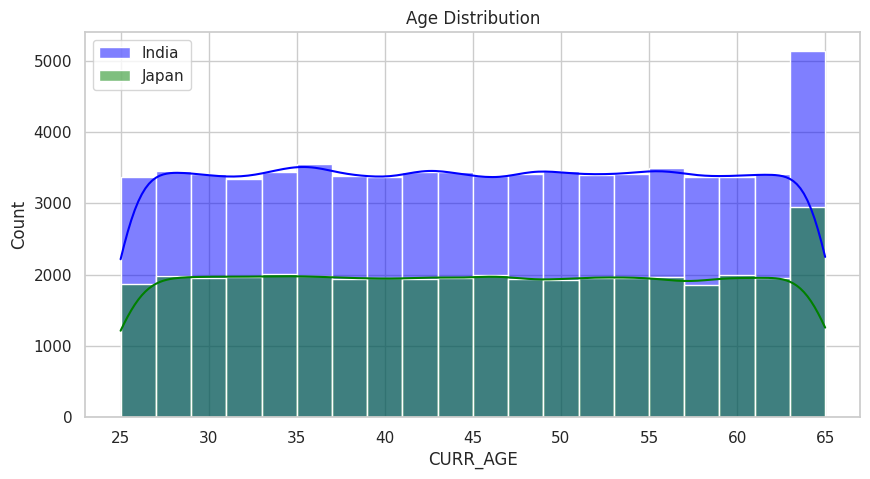

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(indian_df['CURR_AGE'], kde=True, color='blue', label='India', bins=20)
sns.histplot(japanese_df['CURR_AGE'], kde=True, color='green', label='Japan', bins=20)
plt.title('Age Distribution')
plt.legend()
plt.show()

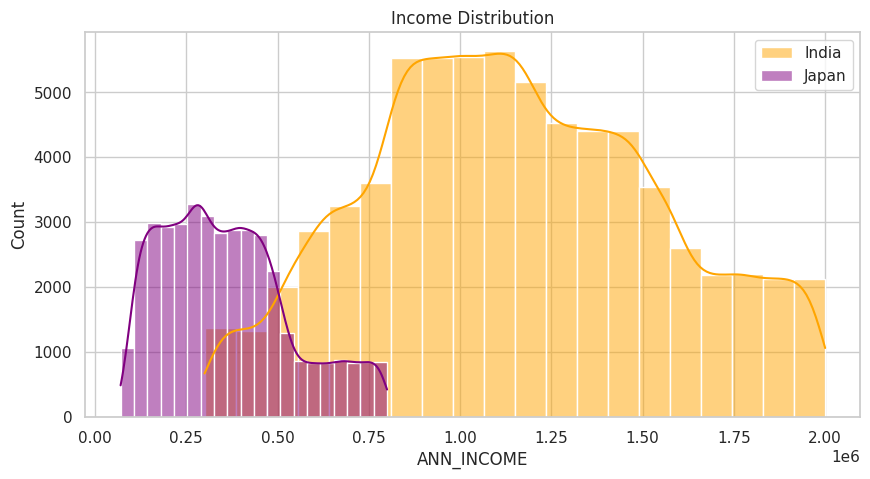

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(indian_df['ANN_INCOME'], kde=True, color='orange', label='India', bins=20)
sns.histplot(japanese_df['ANN_INCOME'], kde=True, color='purple', label='Japan', bins=20)
plt.title('Income Distribution')
plt.legend()
plt.show()

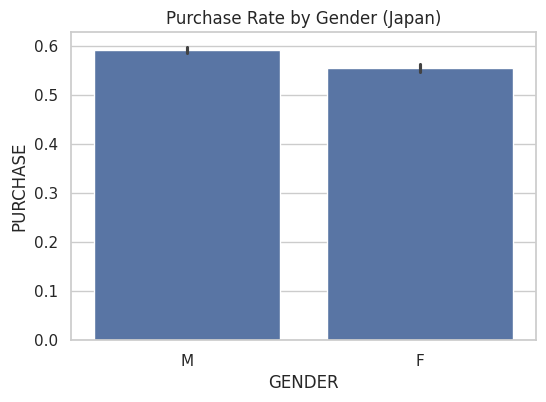

In [18]:
plt.figure(figsize=(6, 4))
sns.barplot(data=japanese_df, x='GENDER', y='PURCHASE')
plt.title('Purchase Rate by Gender (Japan)')
plt.show()

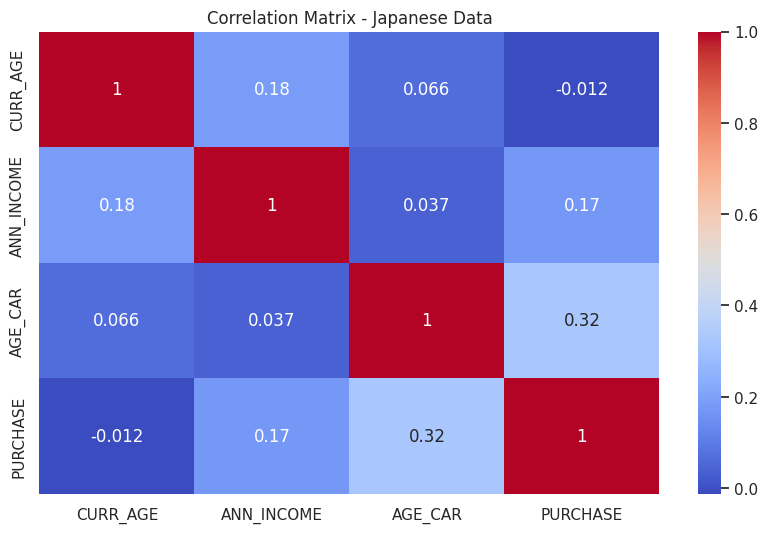

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(japanese_df[['CURR_AGE', 'ANN_INCOME', 'AGE_CAR', 'PURCHASE']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Japanese Data")
plt.show()

In [20]:
# Separate input and output
X = japanese_df.drop('PURCHASE', axis=1)  # input features
y = japanese_df['PURCHASE']               # target label

In [21]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train.drop(['ID', 'GENDER'], axis=1), y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_test.drop(['ID', 'GENDER'], axis=1))

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.685625

Confusion Matrix:
 [[1852 1497]
 [1018 3633]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.55      0.60      3349
           1       0.71      0.78      0.74      4651

    accuracy                           0.69      8000
   macro avg       0.68      0.67      0.67      8000
weighted avg       0.68      0.69      0.68      8000



In [25]:
# See feature importance
coef_df = pd.DataFrame({
    'Feature': X_train.drop(['ID', 'GENDER'], axis=1).columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

display(coef_df)

,Feature,Coefficient
2,AGE_CAR,0.004145
1,ANN_INCOME,0.000002
0,CURR_AGE,-0.010701


In [27]:
# Prepare Indian dataset for prediction
# Drop columns not used in training and add missing 'AGE_CAR' column
indian_df_for_prediction = indian_df.drop(['ID', 'GENDER', 'DT_MAINT'], axis=1)
indian_df_for_prediction['AGE_CAR'] = 0 # Add AGE_CAR column with a placeholder value

# Ensure the columns are in the same order as the training data
# Get the columns from the training data used in the model
training_columns = X_train.drop(['ID', 'GENDER'], axis=1).columns
indian_df_for_prediction = indian_df_for_prediction[training_columns]


# Apply the model to Indian dataset
indian_predictions = model.predict(indian_df_for_prediction)

# Add prediction column to the original indian_df
indian_df['Predicted_Purchase'] = indian_predictions

In [28]:
# Count how many are predicted to buy a car
potential_buyers = indian_df['Predicted_Purchase'].sum()
print("Predicted Potential Buyers in India:", potential_buyers)

# Compare with the target (12,000)
if potential_buyers >= 12000:
    print("✅ ABG Motors should enter the Indian market!")
else:
    print("❌ ABG Motors may reconsider. Forecast is below 12,000.")

Predicted Potential Buyers in India: 54217
✅ ABG Motors should enter the Indian market!


In [31]:
# Prepare Indian dataset for prediction
# Drop columns not used in training and add missing 'AGE_CAR' column
indian_df_for_prediction = indian_df.drop(['ID', 'GENDER', 'DT_MAINT'], axis=1)
indian_df_for_prediction['AGE_CAR'] = 0 # Add AGE_CAR column with a placeholder value

# Ensure the columns are in the same order as the training data
# Get the columns from the training data used in the model
training_columns = X_train.drop(['ID', 'GENDER'], axis=1).columns
indian_df_for_prediction = indian_df_for_prediction[training_columns]


# Apply the model to Indian dataset
indian_predictions = model.predict(indian_df_for_prediction)

# Add prediction column to the original indian_df
indian_df['Predicted_Purchase'] = indian_predictions

In [32]:
# Save the updated CSV
indian_df.to_csv("cleaned_indian_with_predictions.csv", index=False)
